# Install PyCaret

In [1]:
# install libraries
# !pip install pycaret shap==0.42.0

Runtime --> Restart Runtime

# Dataset

In [2]:
# load hepatitis dataset
from pycaret.datasets import get_data
data = get_data('hepatitis')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


Abstract: From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)

https://archive.ics.uci.edu/ml/datasets/hepatitis

Attribute Information:
1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

# Exploratory Data Analysis

In [3]:
# check the shape of data (Rows x Columns)
data.shape

(154, 20)

In [4]:
# check missing values by column
data.isna().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [5]:
# check summary statistics
data.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,154.000000,154.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,154.000000
mean,0.207792,41.246753,1.103896,1.509804,1.844156,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.454545
std,0.407051,12.593344,0.306121,0.501546,0.363891,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499554
min,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,0.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,0.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,0.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [6]:
# check the target balance
data['Class'].value_counts()

0    122
1     32
Name: Class, dtype: int64

<Axes: >

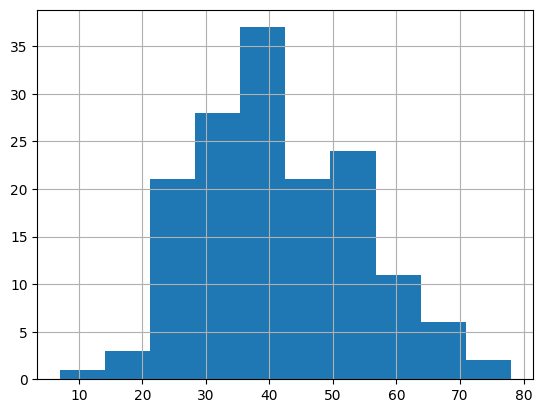

In [7]:
data['AGE'].hist()

<Axes: >

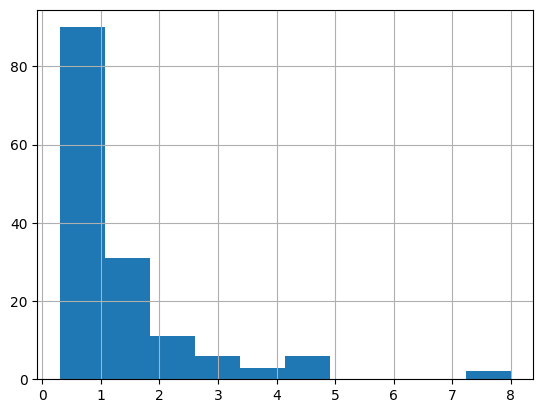

In [8]:
data['BILIRUBIN'].hist()

# Machine Learning Model Training

In [9]:
from pycaret.classification import *
s = setup(data, target = 'Class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9264,0.8736,0.8167,0.8667,0.8205,0.7747,0.7882,0.0170
ridge,Ridge Classifier,0.9164,0.8674,0.7667,0.8667,0.7871,0.7362,0.7549,0.0170
rf,Random Forest Classifier,0.9055,0.9278,0.7167,0.8500,0.7571,0.6989,0.7148,0.1010
lr,Logistic Regression,0.8982,0.8632,0.7833,0.7833,0.7667,0.7028,0.7142,1.1360
et,Extra Trees Classifier,0.8982,0.8958,0.6333,0.7833,0.6833,0.6324,0.6476,0.0900
lightgbm,Light Gradient Boosting Machine,0.8600,0.8875,0.6333,0.6000,0.6005,0.5256,0.5354,0.0880
gbc,Gradient Boosting Classifier,0.8591,0.8660,0.5833,0.5833,0.5700,0.5048,0.5131,0.0730
nb,Naive Bayes,0.8309,0.8826,0.8333,0.6117,0.6940,0.5840,0.6038,0.0170
qda,Quadratic Discriminant Analysis,0.8218,0.8382,0.2500,0.2333,0.2267,0.2109,0.2210,0.0160
ada,Ada Boost Classifier,0.8218,0.8674,0.5667,0.5233,0.4971,0.4125,0.4449,0.0600


In [11]:
best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

# Model Analysis and Interpretation

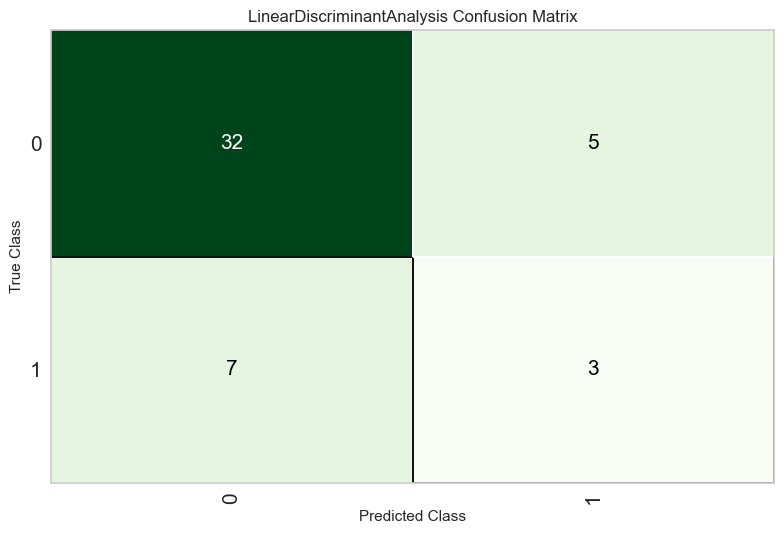

In [12]:
plot_model(best_model, plot = 'confusion_matrix')

In [13]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.5000,0.5000,1.0000,0.6667,0.6207,0.6708
3,0.8182,0.9444,1.0000,0.5000,0.6667,0.5600,0.6236
4,0.8182,0.8333,0.5000,0.5000,0.5000,0.3889,0.3889
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.6364,0.5417,0.3333,0.3333,0.3333,0.0833,0.0833
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


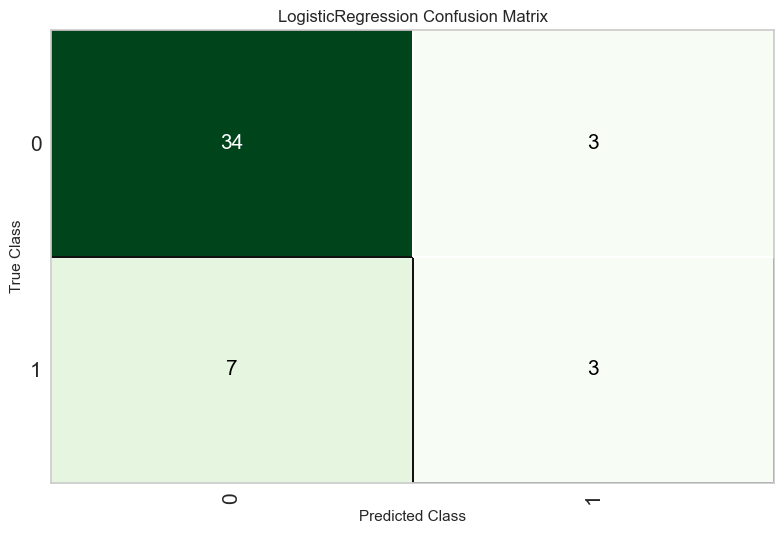

In [14]:
plot_model(lr, plot = 'confusion_matrix')

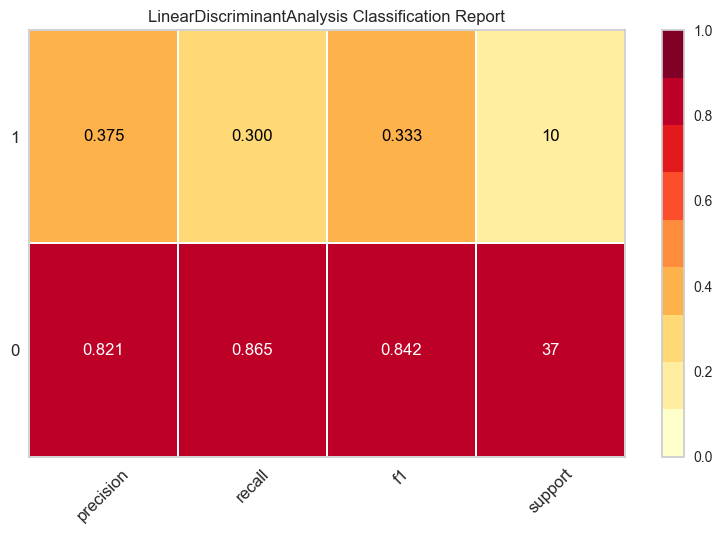

In [15]:
plot_model(best_model, plot = 'class_report')

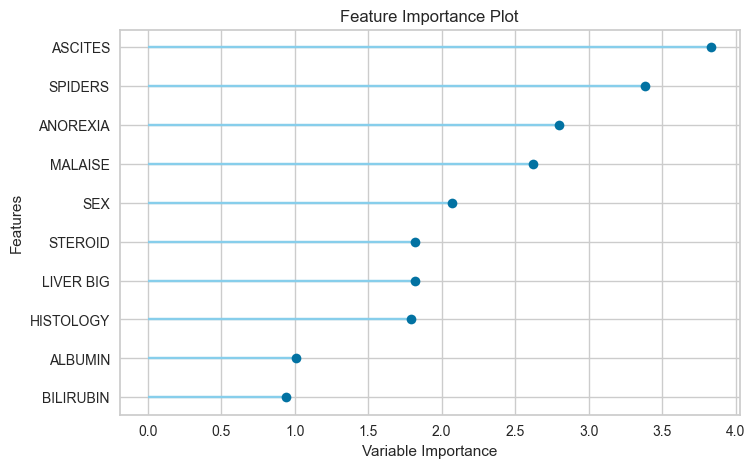

In [16]:
plot_model(best_model, plot = 'feature')

In [17]:
# create lightgbm
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.6667,0.8000,0.7442,0.7698
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.7222,0.5000,1.0000,0.6667,0.6207,0.6708
3,0.8182,0.9444,0.5000,0.5000,0.5000,0.3889,0.3889
4,0.8182,0.8333,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8182,0.9167,0.6667,0.6667,0.6667,0.5417,0.5417
6,0.7273,0.8333,0.6667,0.5000,0.5714,0.3774,0.3858
7,0.9000,0.8750,1.0000,0.6667,0.8000,0.7368,0.7638
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


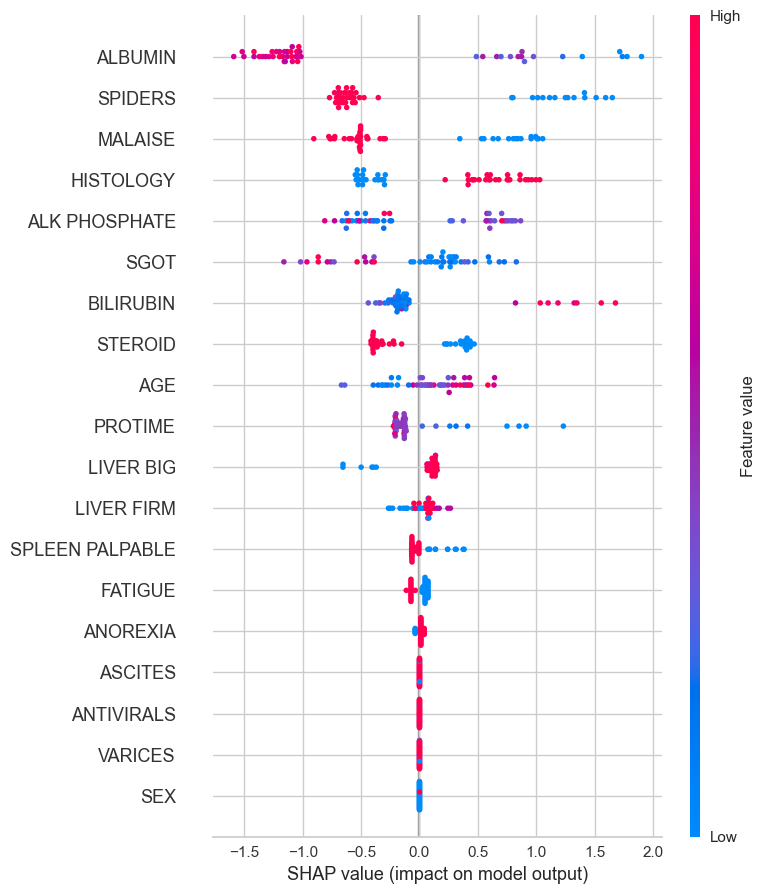

In [18]:
# interpret lightgbm
interpret_model(lightgbm)

In [19]:
# patient number 1
get_config('X_test').iloc[1]

AGE                54.0
SEX                 1.0
STEROID             1.0
ANTIVIRALS          2.0
FATIGUE             1.0
MALAISE             1.0
ANOREXIA            2.0
LIVER BIG           2.0
LIVER FIRM          2.0
SPLEEN PALPABLE     2.0
SPIDERS             2.0
ASCITES             1.0
VARICES             2.0
BILIRUBIN           1.2
ALK PHOSPHATE      85.0
SGOT               92.0
ALBUMIN             3.1
PROTIME            66.0
HISTOLOGY           2.0
Name: 127, dtype: float32

In [20]:
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [21]:
# patient number 1
get_config('X_test').iloc[10]

AGE                 37.0
SEX                  1.0
STEROID              2.0
ANTIVIRALS           2.0
FATIGUE              2.0
MALAISE              2.0
ANOREXIA             2.0
LIVER BIG            2.0
LIVER FIRM           2.0
SPLEEN PALPABLE      2.0
SPIDERS              2.0
ASCITES              2.0
VARICES              2.0
BILIRUBIN            0.7
ALK PHOSPHATE       26.0
SGOT                58.0
ALBUMIN              4.5
PROTIME            100.0
HISTOLOGY            1.0
Name: 59, dtype: float32

In [22]:
interpret_model(lightgbm, plot = 'reason', observation = 10)

Spider angiomas (spider-like blood vessels on the skin) are one of the main symptoms caused by a hepatitis C (HCV virus) infection. Discovering an infected patient with hepatitis C early on in the infection phase increases the chances of the virus being successfully treated and cured by oral medication.

# Model Deployment

In [23]:
# create a copy of data and remove target column
data_new = data.copy()
data_new.drop('Class', axis=1, inplace=True)
data_new.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [24]:
# finalizing best model
final_model = finalize_model(best_model)

In [25]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AGE', 'SEX', 'STEROID',
                                             'ANTIVIRALS', 'FATIGUE', 'MALAISE',
                                             'ANOREXIA', 'LIVER BIG',
                                             'LIVER FIRM', 'SPLEEN PALPABLE',
                                             'SPIDERS', 'ASCITES', 'VARICES',
                                             'BILIRUBIN', 'ALK PHOSPHATE',
                                             'SGOT', 'ALBUMIN', 'PROTIME',
                                             'HISTOLOGY'],
                                    transformer=SimpleImputer(add_indicator=...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

In [26]:
# generate predictions
predictions = predict_model(final_model, data = data_new)
predictions.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,...,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,prediction_label,prediction_score
0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,...,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,0,0.9995
1,50,1,1.0,2,1,2,2,1.0,2.0,2.0,...,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,0,0.9911
2,78,1,2.0,2,1,2,2,2.0,2.0,2.0,...,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,0,0.9874
3,31,1,NaN,1,2,2,2,2.0,2.0,2.0,...,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,0,0.9921
4,34,1,2.0,2,2,2,2,2.0,2.0,2.0,...,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,0,0.9954


In [27]:
# add actual label
predictions['Class'] = data['Class']
predictions.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,...,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,prediction_label,prediction_score,Class
0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,...,2.0,1.0,85.0,18.0,4.0,NaN,1,0,0.9995,0
1,50,1,1.0,2,1,2,2,1.0,2.0,2.0,...,2.0,0.9,135.0,42.0,3.5,NaN,1,0,0.9911,0
2,78,1,2.0,2,1,2,2,2.0,2.0,2.0,...,2.0,0.7,96.0,32.0,4.0,NaN,1,0,0.9874,0
3,31,1,NaN,1,2,2,2,2.0,2.0,2.0,...,2.0,0.7,46.0,52.0,4.0,80.0,1,0,0.9921,0
4,34,1,2.0,2,2,2,2,2.0,2.0,2.0,...,2.0,1.0,NaN,200.0,4.0,NaN,1,0,0.9954,0


In [28]:
# save the best model as a file
save_model(final_model, 'hepatitis_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AGE', 'SEX', 'STEROID',
                                              'ANTIVIRALS', 'FATIGUE', 'MALAISE',
                                              'ANOREXIA', 'LIVER BIG',
                                              'LIVER FIRM', 'SPLEEN PALPABLE',
                                              'SPIDERS', 'ASCITES', 'VARICES',
                                              'BILIRUBIN', 'ALK PHOSPHATE',
                                              'SGOT', 'ALBUMIN', 'PROTIME',
                                              'HISTOLOGY'],
                                     transformer=SimpleImputer(add_indicator=...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('c